# Import Package

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, complete


# Record File ("Country.csv")

In [25]:
df = pd.read_csv("Country.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Info Dataframe

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Akses Dataframe

In [27]:
df_Country = df.loc[:]
df_Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# K-MEANS Clustering
Algoritma ini menemukan kelompok data dengan nilai squared error antara rata-rata empiris dari cluster dan point di cluster minimum. Algoritma ini termasuk dalam clustering dengan pendekatan partitional. Setiap cluster berhubungan dengan centroid (point tengah). Setiap point dimasukkan pada cluster dengan centroid terdekat. Pada algoritma ini nilai K == cluster harus ditentukan.

In [30]:
model = KMeans(n_clusters=3)

df_Country["country"] = df_Country.country
points = df_Country[["exports","imports"]]

model.fit(points)

labels = model.labels_ 

print(labels)

[0 0 0 2 2 0 0 0 2 0 0 2 0 0 2 2 2 0 2 0 0 2 0 2 2 0 0 2 0 0 2 0 0 0 0 0 0
 2 2 0 2 0 2 2 2 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 2
 0 0 0 0 2 0 0 2 2 2 0 2 2 2 2 2 2 1 2 0 0 2 2 0 1 2 2 2 2 2 2 0 0 0 2 0 2
 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 2 2 2 0 2 0 0 0 0 2 0 2 0 0
 2 0 2 0 2 0 2 0 2 2 0 0 0 0 2 0 2 0 0]


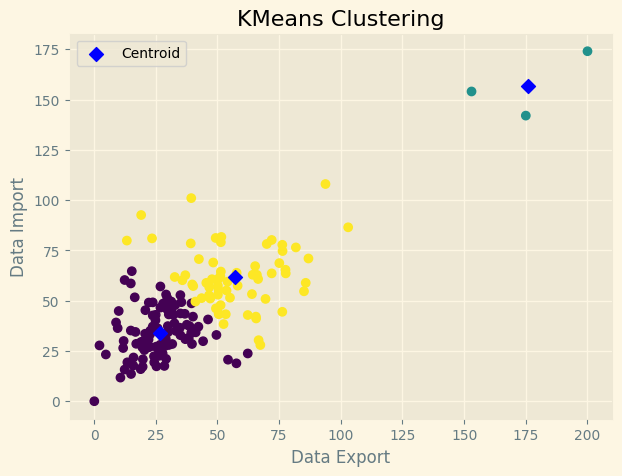

In [32]:
plt.style.use('Solarize_Light2')

ctr = model.cluster_centers_

ctr_x = ctr[:,0]
ctr_y = ctr[:,1]

plt.figure(1, figsize=(7,5))
plt.scatter(points["exports"], points["imports"], alpha=1, c=labels)
plt.scatter(ctr_x, ctr_y, marker="D", s=50, label="Centroid", c='blue')

plt.title("KMeans Clustering")
plt.xlabel("Data Export")
plt.ylabel("Data Import")
plt.legend()

plt.show()

In [33]:
dsk_Country = pd.DataFrame({"labels": labels,"country": df_Country.country})
ct_Country = pd.crosstab(dsk_Country["labels"], dsk_Country["country"])
ct_Country

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
labels,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,0,1,1,1,0,1,...,0,1,1,1,1,0,1,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


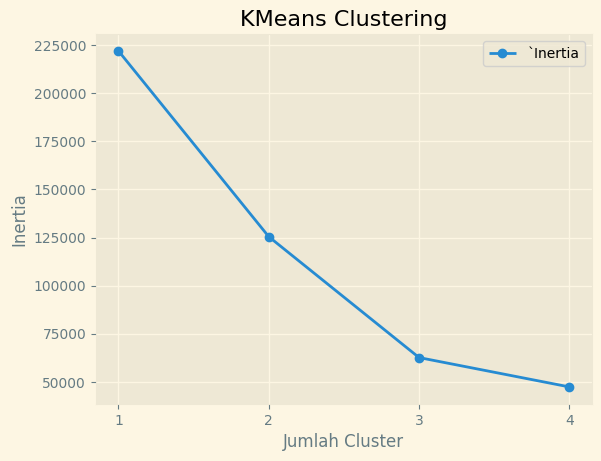

In [34]:
cluster_sum = range(1,5)
inertia = []

for cluster in cluster_sum:
    model = KMeans(n_clusters=cluster)
    model.fit(points)
    inertia.append(model.inertia_)
    
plt.plot(cluster_sum, inertia, '-o', label="`Inertia")
plt.xticks(cluster_sum)

plt.title("KMeans Clustering")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.legend()

plt.show()

# Hierarchical Clustering
Algoritma ini menghasilkan sekumpulan cluster bersarang dalam bentuk hirarki pohon. Algoritma ini dapat divisualisasikan menggunakan dendogram atau bubble. Algoritma ini tidak harus menentukan jumlah cluster. Jumlah cluster yang diinginkan didapatkan dengan memotong dendogram pada level yang tepat.

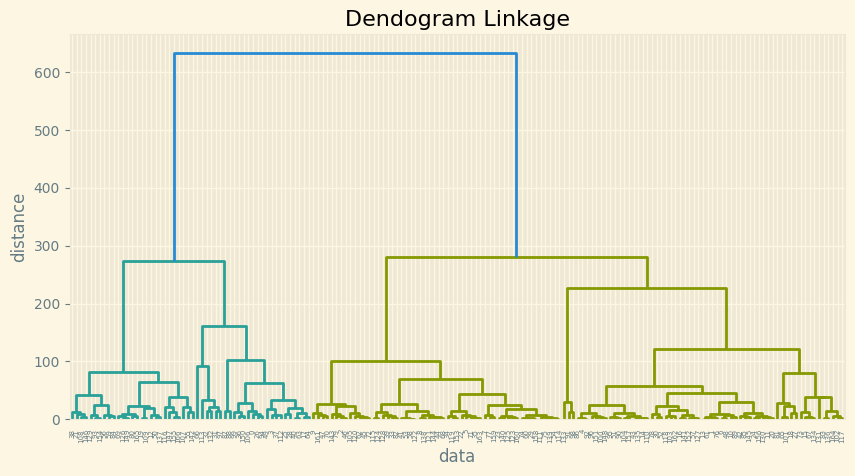

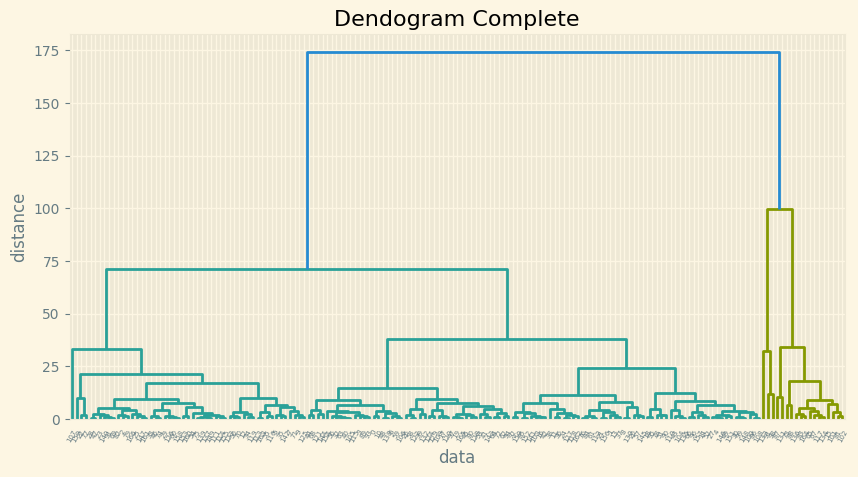

In [38]:
points_linkage = df_Country.iloc[:,[4,1,]].values
points_complete = df_Country.iloc[:,[4,3,]].values

hr_linkage = linkage(points_linkage, method='ward')
hr_complete = complete(points_complete)

# Visualisasi hasil model Dendogram Linkage
plt.figure(1, figsize=(10, 5))
dendrogram(hr_linkage)
plt.title('Dendogram Linkage')
plt.xlabel('data')
plt.ylabel('distance')

# Visualisasi hasil model Dendogram Complete
plt.figure(2, figsize=(10, 5))
dendrogram(hr_complete)
plt.title('Dendogram Complete')
plt.xlabel('data')
plt.ylabel('distance')
plt.xticks(rotation=60)

plt.show()

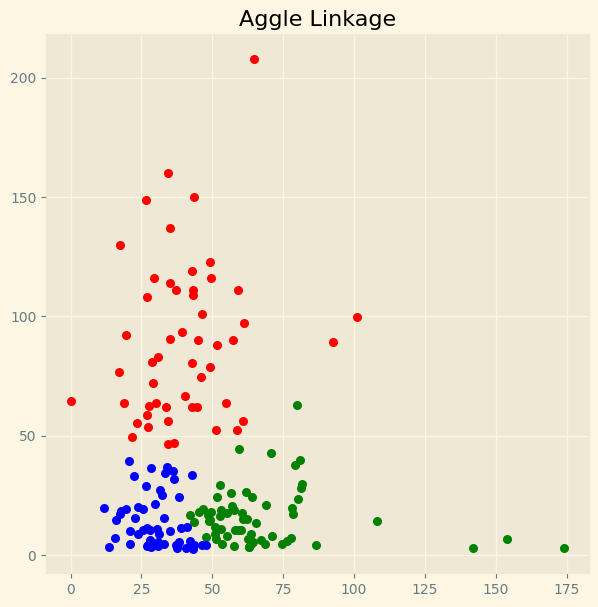

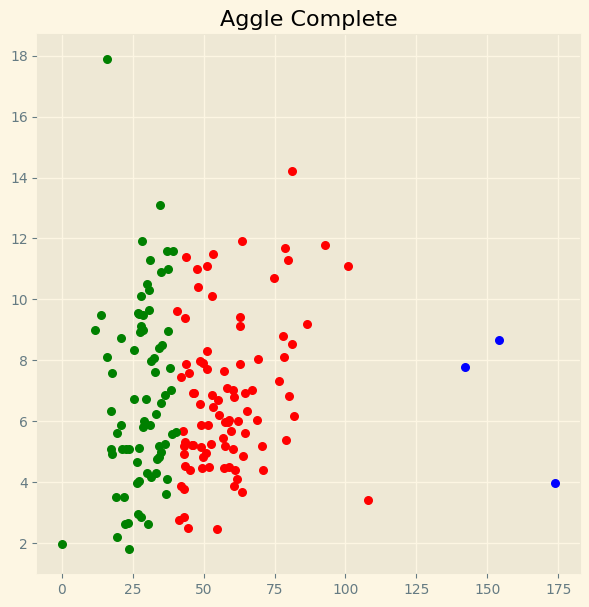

In [39]:
ag_linkage = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ag_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean')

pr_linkage = ag_linkage.fit_predict(points_linkage)
pr_complete = ag_complete.fit_predict(points_complete)

# Visualisasi hasil model Aggle Linkage
plt.figure(1, figsize=(7,7))
plt.scatter(points_linkage[pr_linkage==0,0], points_linkage[pr_linkage==0,1], s=30, c='red')
plt.scatter(points_linkage[pr_linkage==1,0], points_linkage[pr_linkage==1,1], s=30, c='green')
plt.scatter(points_linkage[pr_linkage==2,0], points_linkage[pr_linkage==2,1], s=30, c='blue')
plt.title('Aggle Linkage')

# Visualisasi hasil model Aggle Complete
plt.figure(2, figsize=(7,7))
plt.scatter(points_complete[pr_complete==0,0], points_complete[pr_complete==0,1], s=30, c='red')
plt.scatter(points_complete[pr_complete==1,0], points_complete[pr_complete==1,1], s=30, c='green')
plt.scatter(points_complete[pr_complete==2,0], points_complete[pr_complete==2,1], s=30, c='blue')
plt.title('Aggle Complete')

plt.show()